In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa

from glob import glob

In [4]:
audio_files = glob('..\\data\\audio\\today\\*.mp3')
len(audio_files), audio_files[0]

(21, '..\\data\\audio\\today\\mp3-output-ttsfree(dot)com (1).mp3')

In [10]:
ipd.Audio(audio_files[0])

## Making Spectrograms
### 1. loading a file

In [7]:
y, sr = librosa.load(audio_files[0])
y.shape, sr

((17749,), 22050)

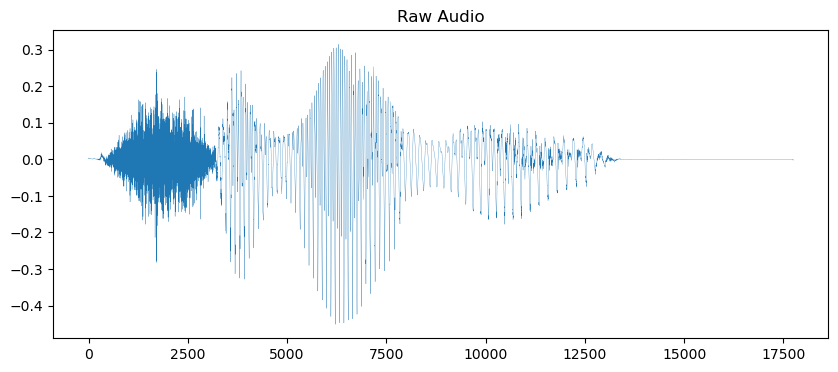

In [9]:
pd.Series(y).plot(figsize=(10, 4), lw=0.2, title='Raw Audio');

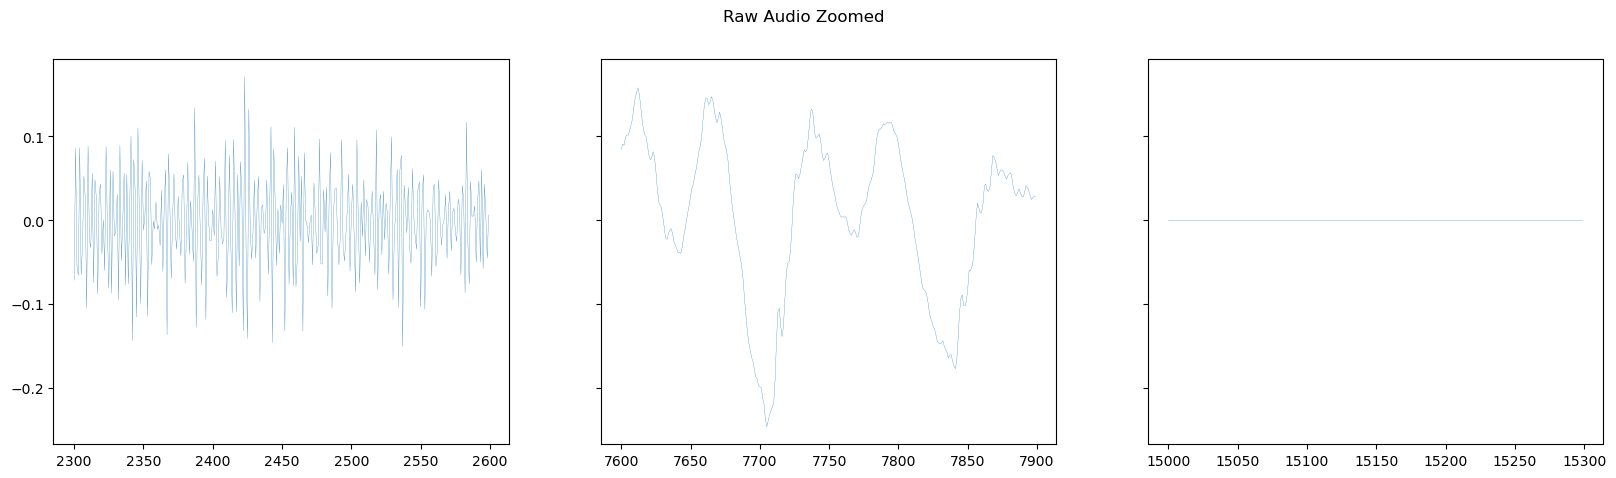

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
pd.Series(y)[2300:2600].plot(lw=0.2, ax=ax1)
pd.Series(y)[7600:7900].plot(lw=0.2, ax=ax2)
pd.Series(y)[15000:15300].plot(lw=0.2, ax=ax3)
fig.suptitle('Raw Audio Zoomed')
plt.show()


### 2. applying Fourier transformation

In [23]:
# short-time fourier transform
D = librosa.stft(y)
D.shape

(1025, 35)

c:\Users\burjo\miniconda3\envs\speech\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


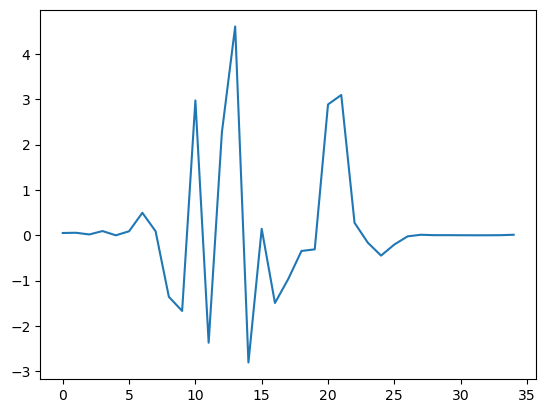

In [30]:
pd.Series(D[40]).plot();

In [26]:
# converting to decibels - sort of logarifmic, closer to human perception of sound 
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # ref is what mapped to 0db, all other values will be negative
S_db.shape

(1025, 35)

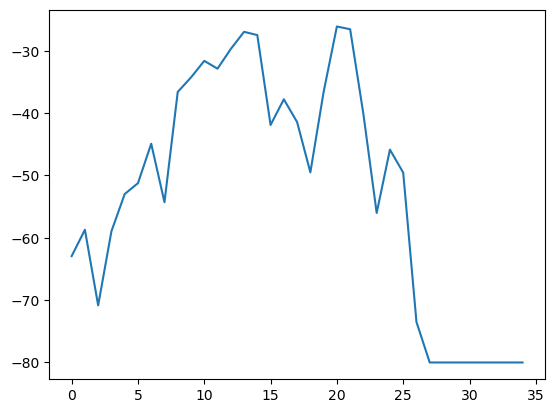

In [32]:
pd.Series(S_db[40]).plot();

### 3. Drawing a spectrogram

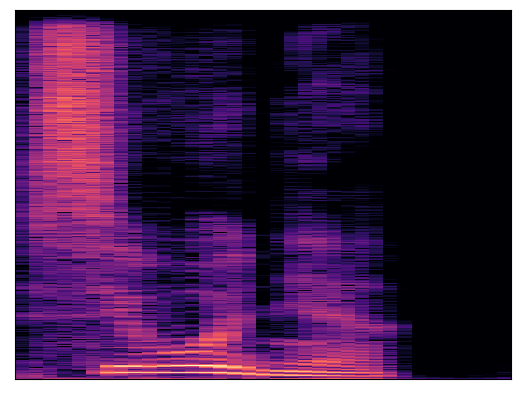

In [35]:
librosa.display.specshow(S_db)

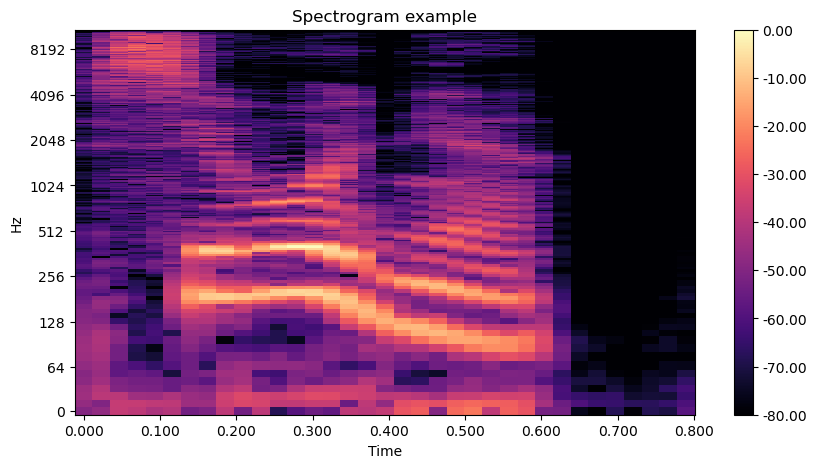

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram example')
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Mel-Spectrogram

In [41]:
S_mel = librosa.feature.melspectrogram(y=y, sr=sr)
S_mel.shape

(128, 35)

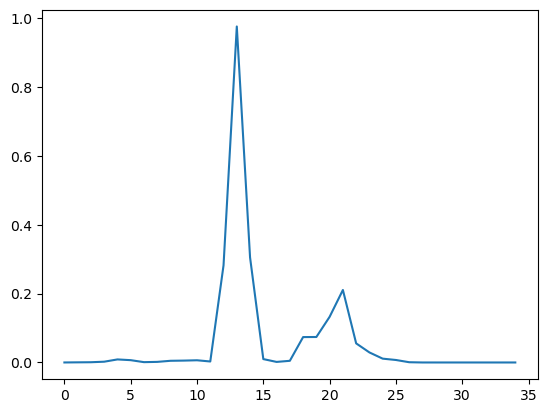

In [44]:
pd.Series(S_mel[40]).plot();

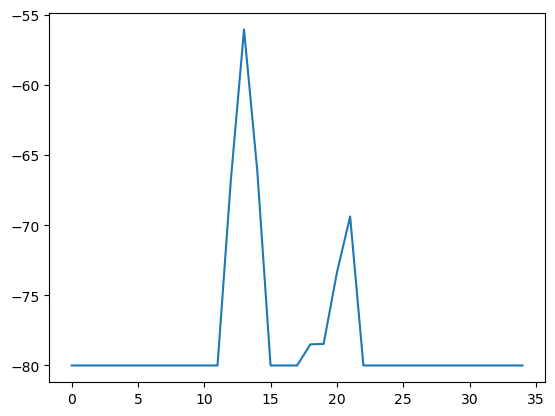

In [45]:
S_db_mel = librosa.amplitude_to_db(S_mel, ref=np.max)

pd.Series(S_db_mel[40]).plot();

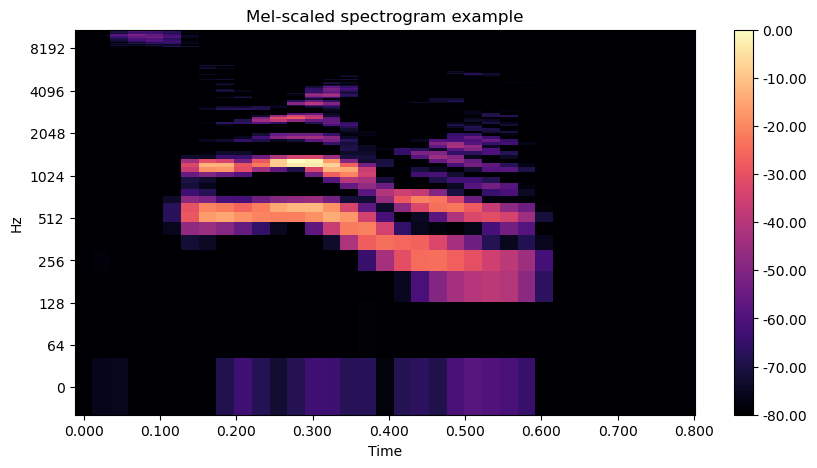

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel-scaled spectrogram example')
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Saving spectrogram to file

In [55]:
from pathlib import Path

In [58]:
def create_spectrogram(audio_path, name):
    # creating a spectrogram
    y, sr = librosa.load(audio_path)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(D, ref=np.max)

    # saving to file
    plt.interactive(False)
    fig, ax = plt.subplots(figsize=(0.72, 0.72))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    librosa.display.specshow(S_db)
    saving_path = Path('../data/specs/today/' + name + '.jpg')
    plt.savefig(saving_path, dpi=400, bbox_inches='tight', pad_inches=0)
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del audio_path, D, S_db, sr, fig, ax, saving_path




In [59]:
create_spectrogram(audio_files[0], 'tts1')

C:\Users\burjo\AppData\Local\Temp\ipykernel_14768\483095560.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  S_db = librosa.amplitude_to_db(D, ref=np.max)
